In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

# **Dataset - Company Data**

In [2]:
df = pd.read_csv("/content/Fraud_check.csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# **Dataset - Information**

> Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

**Data Description :**
---

1. Undergrad : person is under graduated or not
2. Marital.Status : marital status of a person
3. Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
4. Work Experience : Work experience of an individual person
5. Urban : Whether that person belongs to urban area or not



# **EDA**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Taxable.Income,600.0,55208.375000,26204.827597,10003.0,32871.50,55074.5,78611.75,99619.0
City.Population,600.0,108747.368333,49850.075134,25779.0,66966.75,106493.5,150114.25,199778.0
Work.Experience,600.0,15.558333,8.842147,0.0,8.00,15.0,24.00,30.0


In [5]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [6]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [7]:
for i in df.columns :
    print(i , '\n', df[i].value_counts())

Undergrad 
 YES    312
NO     288
Name: Undergrad, dtype: int64
Marital.Status 
 Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64
Taxable.Income 
 59689    2
68833    1
60822    1
93090    1
79373    1
        ..
61906    1
31088    1
70365    1
56536    1
96519    1
Name: Taxable.Income, Length: 599, dtype: int64
City.Population 
 57194     2
162777    2
50047     1
130912    1
64070     1
         ..
145744    1
58225     1
28661     1
117260    1
158137    1
Name: City.Population, Length: 598, dtype: int64
Work.Experience 
 10    31
13    28
30    25
28    25
12    25
14    24
11    23
21    23
5     22
27    22
26    22
7     21
29    21
19    21
16    19
6     19
25    19
2     19
17    18
15    18
24    17
23    16
20    15
0     14
1     14
8     14
3     14
4     14
22    13
9     13
18    11
Name: Work.Experience, dtype: int64
Urban 
 YES    302
NO     298
Name: Urban, dtype: int64


In [8]:
for col in df:
    print(f'{col}:\n {df[col].unique()}')

Undergrad:
 ['NO' 'YES']
Marital.Status:
 ['Single' 'Divorced' 'Married']
Taxable.Income:
 [68833 33700 36925 50190 81002 33329 83357 62774 83519 98152 29732 61063
 11794 61830 64070 69869 24987 39476 97957 10987 88636 14310 78969 92040
 38239 31417 55299 87778 10379 94033 73854 64007 97200 82071 12514 31336
 10163 68513 14912 74010 50777 49436 96485 70339 33614 81079 31532 44034
 16264 45706 79616 40137 97703 21917 81939 19925 34703 78573 10870 65065
 94418 26972 91684 51685 62158 58312 42507 61486 10150 99619 89302 94287
 41344 41382 32434 61105 67628 31458 73411 10329 44947 35610 66564 87348
 69098 28449 39277 13747 86652 26741 77634 99325 85651 15296 10348 41395
 22258 79583 22187 52495 93078 35072 32662 89250 41641 55873 19169 46629
 51927 69224 24557 77762 96355 90910 21945 79357 42784 54638 29944 97318
 52022 20391 21016 26679 70682 87326 15853 75501 97984 53378 93458 56501
 46955 33492 35832 12470 53981 22773 84691 50087 27877 56647 59419 26783
 79453 33962 84429 63057 43128 40

In [9]:
# find categorical and numeric variables

categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n', categorical)
print('\n')
numeric = [var for var in df.columns if df[var].dtype!='O']
print('There are {} Numeric variables\n'.format(len(numeric)))
print('The Numeric variables are :\n', numeric)

There are 3 categorical variables

The categorical variables are :
 ['Undergrad', 'Marital.Status', 'Urban']


There are 3 Numeric variables

The Numeric variables are :
 ['Taxable.Income', 'City.Population', 'Work.Experience']


In [10]:
num_columns = df.select_dtypes(exclude='object').columns.tolist()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

,Taxable.Income,City.Population,Work.Experience
skewness,0.030015,0.125009,0.018529
kurtosis,-1.199782,-1.120154,-1.167524


Skew: 0.030014788906377175
Kurtosis: -1.1997824607083138


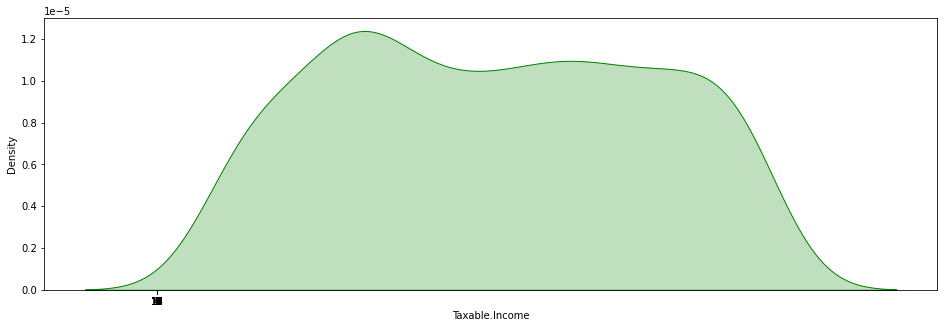

Skew: 0.12500898782679504
Kurtosis: -1.1201539229184019


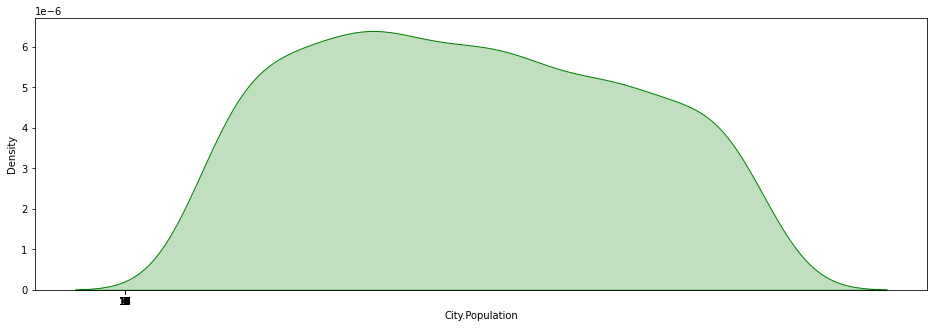

Skew: 0.01852862786533781
Kurtosis: -1.1675237113768457


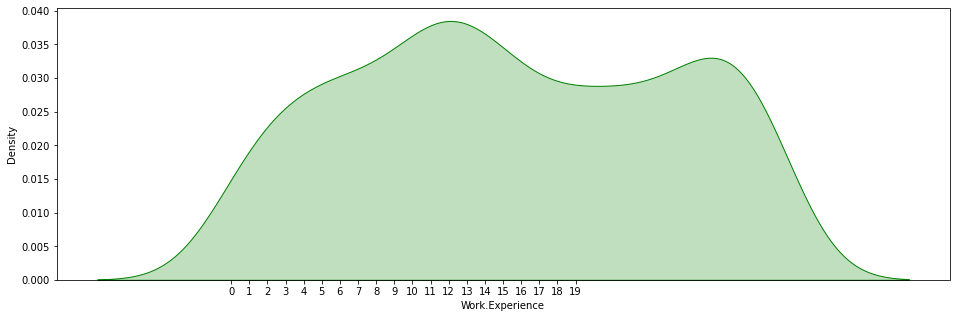

In [11]:
for i in numeric:
  plt.figure(figsize=(16,5))
  print("Skew: {}".format(df[i].skew()))
  print("Kurtosis: {}".format(df[i].kurtosis()))
  ax = sns.kdeplot(df[i],shade=True,color='g')
  plt.xticks([i for i in range(0,20,1)])
  plt.show()


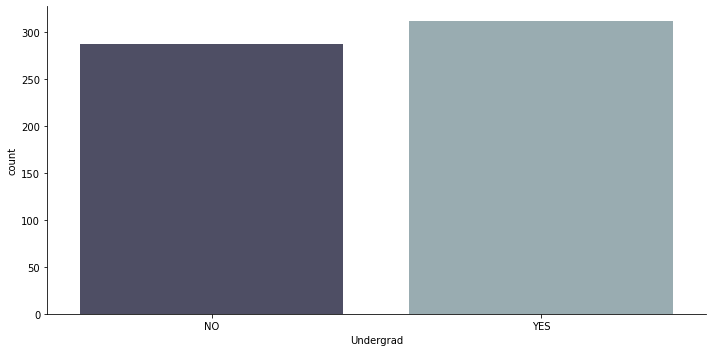

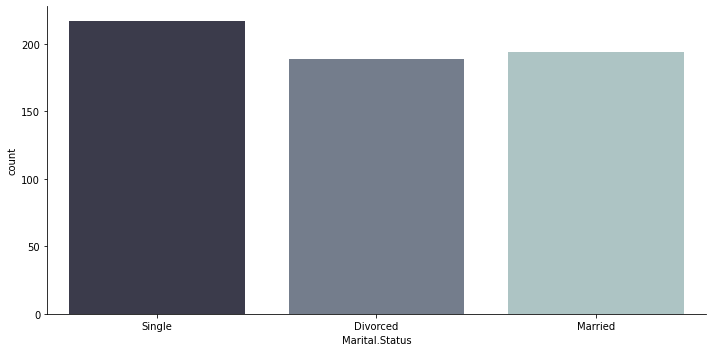

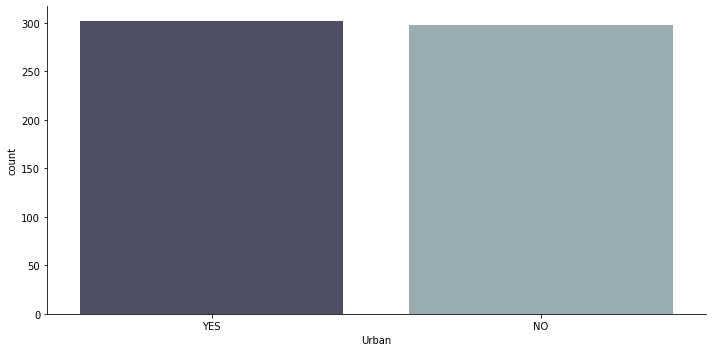

In [12]:
for i in categorical:
  sns.catplot(i, data=df, kind="count",height = 5,aspect = 2, palette="bone")
  

<Figure size 432x288 with 0 Axes>

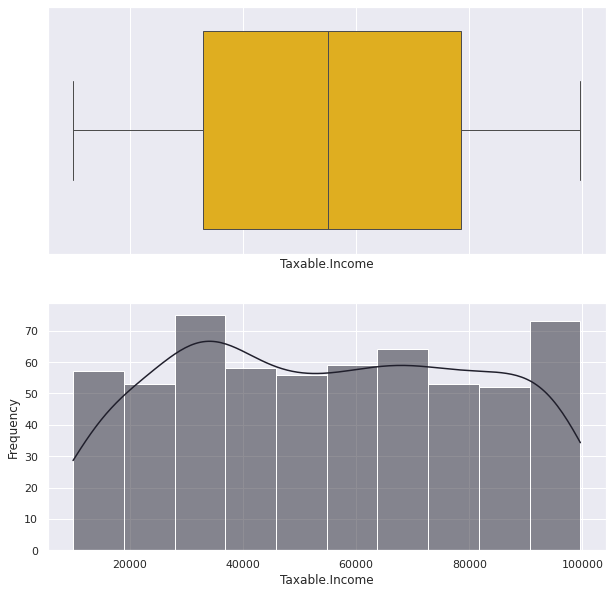

<Figure size 720x720 with 0 Axes>

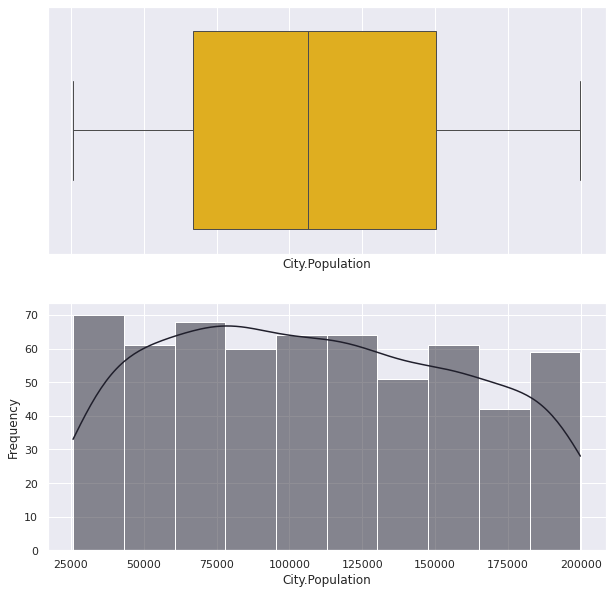

<Figure size 720x720 with 0 Axes>

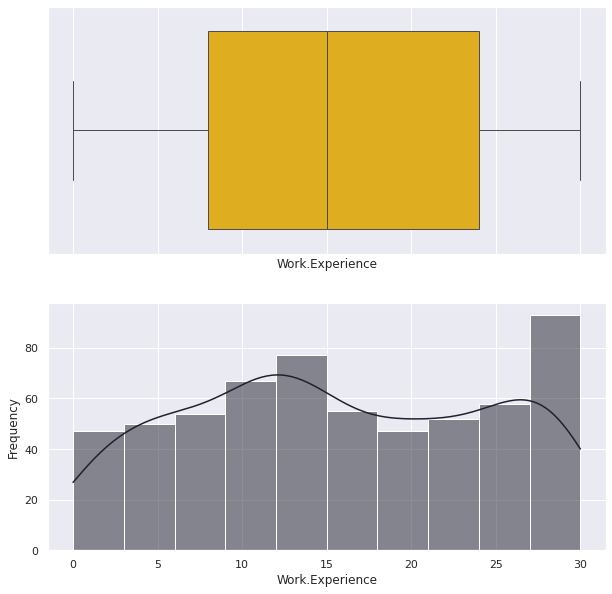

In [13]:
for i in numeric:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(10, 10)}, palette="bone")
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i], ax=ax_box , linewidth= 1.0, palette="Wistia_r")
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True, palette="Wistia_r")

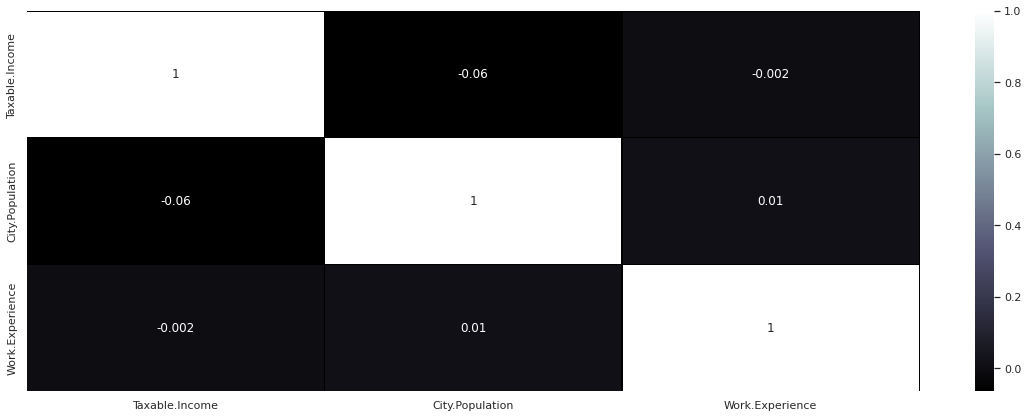

In [14]:
plt.figure(figsize=(20,7))
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="bone", annot=True, linecolor='black', linewidths=0.5, fmt='.1g')
  
# displaying heatmap
plt.show()

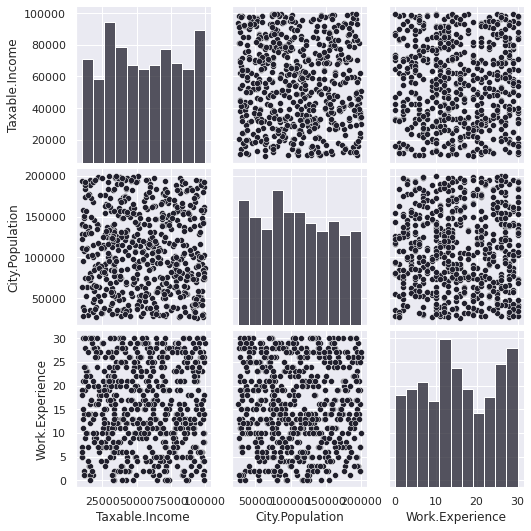

In [15]:
#pairwise plot of all the features
sns.pairplot(df)
plt.show()

# **Data - Preprocessing**

* Adding new columns

In [16]:
#df["fraud"]= df["Taxable.Income"]

In [17]:
df['Taxable.Income'] = np.where( df['Taxable.Income'] <= 30000, 1, 0)

In [18]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,0,50047,10,YES
1,YES,Divorced,0,134075,18,YES
2,NO,Married,0,160205,30,YES
3,YES,Single,0,193264,15,YES
4,NO,Married,0,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,0,39492,7,YES
596,YES,Divorced,0,55369,2,YES
597,NO,Divorced,0,154058,0,YES
598,YES,Married,0,180083,17,NO


In [19]:
df.rename(columns={"Undergrad":"undergrad",
                      "Marital.Status":"marital","City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)

In [20]:
df.head(2)

,undergrad,marital,Taxable.Income,population,experience,urban
0,NO,Single,0,50047,10,YES
1,YES,Divorced,0,134075,18,YES


# **Encoding variables**

In [21]:
data=pd.get_dummies(df,columns=['undergrad','marital','urban'])

In [22]:
data

,Taxable.Income,population,experience,undergrad_NO,undergrad_YES,marital_Divorced,marital_Married,marital_Single,urban_NO,urban_YES
0,0,50047,10,1,0,0,0,1,0,1
1,0,134075,18,0,1,1,0,0,0,1
2,0,160205,30,1,0,0,1,0,0,1
3,0,193264,15,0,1,0,0,1,0,1
4,0,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,0,39492,7,0,1,1,0,0,0,1
596,0,55369,2,0,1,1,0,0,0,1
597,0,154058,0,1,0,1,0,0,0,1
598,0,180083,17,0,1,0,1,0,1,0


# **Feature Scalling**

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)
scaled_data

array([[0.        , 0.13947207, 0.33333333, ..., 1.        , 0.        ,
        1.        ],
       [0.        , 0.62239438, 0.6       , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.77256766, 1.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.73723987, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.88680969, 0.56666667, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.76068253, 0.53333333, ..., 0.        , 1.        ,
        0.        ]])

In [24]:
scaled_data=pd.DataFrame(scaler.fit_transform(data),columns=data.columns, index=data.index)
scaled_data

,Taxable.Income,population,experience,undergrad_NO,undergrad_YES,marital_Divorced,marital_Married,marital_Single,urban_NO,urban_YES
0,0.0,0.139472,0.333333,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.622394,0.600000,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.772568,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.962563,0.500000,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.010081,0.933333,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
595,0.0,0.078811,0.233333,0.0,1.0,1.0,0.0,0.0,0.0,1.0
596,0.0,0.170058,0.066667,0.0,1.0,1.0,0.0,0.0,0.0,1.0
597,0.0,0.737240,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,1.0
598,0.0,0.886810,0.566667,0.0,1.0,0.0,1.0,0.0,1.0,0.0


## **Independent and Dependent Variables**

In [25]:
#x=scaled_data.drop(['fraud'], axis=1)
x=scaled_data.drop(['Taxable.Income'], axis=1)
y=scaled_data["Taxable.Income"]
#y=scaled_data["fraud"]

In [26]:
x

,population,experience,undergrad_NO,undergrad_YES,marital_Divorced,marital_Married,marital_Single,urban_NO,urban_YES
0,0.139472,0.333333,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.622394,0.600000,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,0.772568,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.962563,0.500000,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.010081,0.933333,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
595,0.078811,0.233333,0.0,1.0,1.0,0.0,0.0,0.0,1.0
596,0.170058,0.066667,0.0,1.0,1.0,0.0,0.0,0.0,1.0
597,0.737240,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,1.0
598,0.886810,0.566667,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [27]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
595    0.0
596    0.0
597    0.0
598    0.0
599    0.0
Name: Taxable.Income, Length: 600, dtype: float64

In [28]:
import imblearn

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state = 0)

x, y = ros.fit_resample(x, y)
y_df = pd.DataFrame(y)

## **Splitting Data**

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [30]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(666, 9)
(286, 9)
(666,)
(286,)


# **Model Building**

In [31]:
from sklearn.tree import  DecisionTreeClassifier

# **Building Decision Tree Classifier using Entropy Criteria**

In [32]:
print(f'\n\n To find max depth \n\n')
for i in range(2,20):
  entro_model = DecisionTreeClassifier(criterion = 'entropy',max_depth=i)
  entro_model.fit(x_train, y_train)
  a=entro_model.score(x_train, y_train)
  b=entro_model.score(x_test, y_test)
  print(f' number {i} : train {a} , test {b}')



 To find max depth 


 number 2 : train 0.5615615615615616 , test 0.4965034965034965
 number 3 : train 0.5765765765765766 , test 0.5244755244755245
 number 4 : train 0.5975975975975976 , test 0.534965034965035
 number 5 : train 0.6486486486486487 , test 0.534965034965035
 number 6 : train 0.6561561561561562 , test 0.583916083916084
 number 7 : train 0.7087087087087087 , test 0.6118881118881119
 number 8 : train 0.7432432432432432 , test 0.6923076923076923
 number 9 : train 0.7837837837837838 , test 0.7202797202797203
 number 10 : train 0.8303303303303303 , test 0.7062937062937062
 number 11 : train 0.8618618618618619 , test 0.7622377622377622
 number 12 : train 0.9039039039039038 , test 0.8076923076923077
 number 13 : train 0.9264264264264265 , test 0.8321678321678322
 number 14 : train 0.9384384384384384 , test 0.8251748251748252
 number 15 : train 0.9594594594594594 , test 0.8671328671328671
 number 16 : train 0.9744744744744744 , test 0.8636363636363636
 number 17 : train 0.977477

In [33]:
entro_model = DecisionTreeClassifier(criterion = 'entropy',max_depth=15)
entro_model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15)

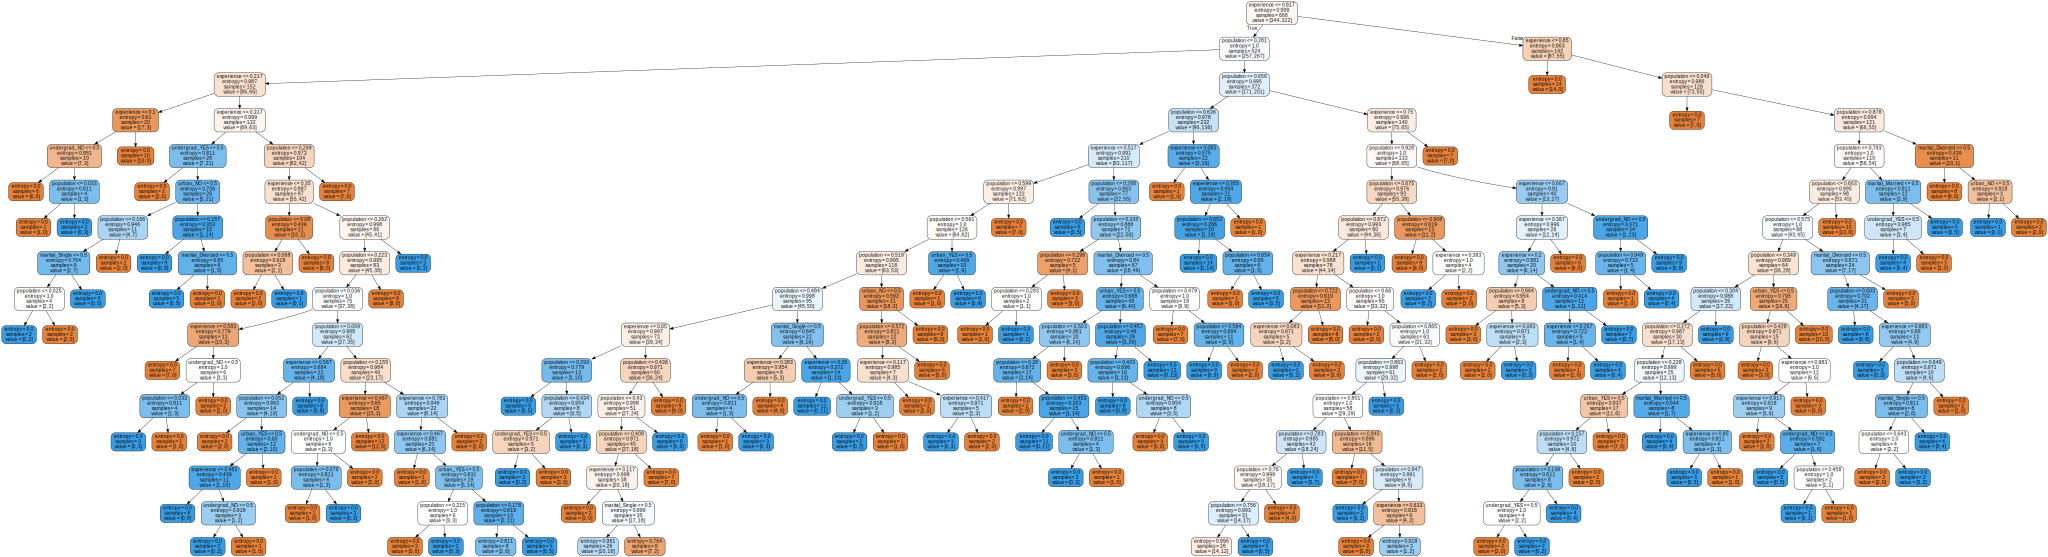

In [34]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(entro_model, filled=True, rounded=True, feature_names=x.columns, out_file=None)
graphviz.Source(dot_data)

In [35]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(entro_model.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(entro_model.score(x_test, y_test)))

Training set score: 0.9595
Test set score: 0.8566


In [36]:
#Predicting on test data
entro_preds = entro_model.predict(x_test) # predicting on test data set 
pd.Series(entro_preds).value_counts()

1.0    179
0.0    107
dtype: int64

In [37]:
df1 = pd.DataFrame({'actual': y_test, 'Prediction': entro_preds})
df1.head()

,actual,Prediction
241,1.0,1.0
844,1.0,1.0
414,0.0,0.0
734,1.0,0.0
543,0.0,0.0


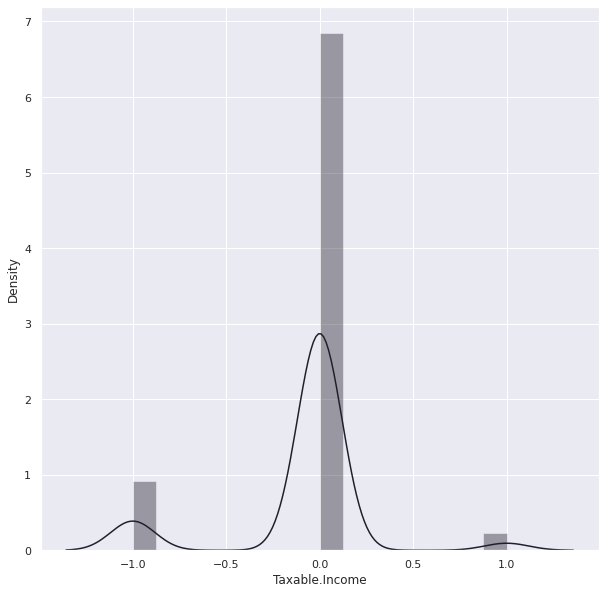

In [38]:
# checking difference between labled y and predicted y
sns.distplot(y_test-entro_preds)

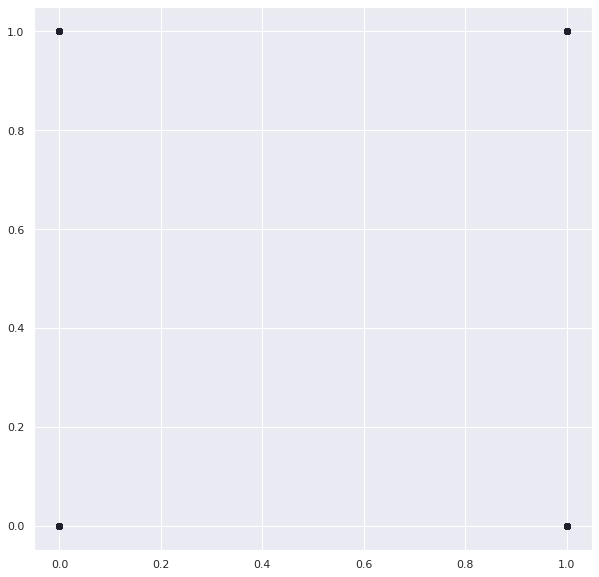

In [39]:
plt.scatter(y_test,entro_preds)

In [40]:
# print the scores between dependent test and predicted value
from sklearn.metrics import accuracy_score
print("Accuracy_score", accuracy_score(y_test,entro_preds)*100)

Accuracy_score 85.66433566433567


In [41]:
cm=pd.crosstab(y_test, entro_preds, rownames = ['Actual'], colnames= ['Predictions']) 
cm

Predictions,0.0,1.0
Actual,,
0.0,99,33
1.0,8,146


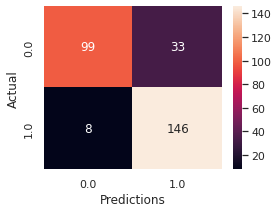

In [42]:
plt.figure(figsize=(4,3))
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

In [43]:
from sklearn.metrics import classification_report

print(classification_report(y_test, entro_preds))

              precision    recall  f1-score   support

         0.0       0.93      0.75      0.83       132
         1.0       0.82      0.95      0.88       154

    accuracy                           0.86       286
   macro avg       0.87      0.85      0.85       286
weighted avg       0.87      0.86      0.85       286



In [44]:
from sklearn.metrics import confusion_matrix,accuracy_score, mean_squared_error,classification_report

# RMSE for train data
train_preds_grid = entro_model.predict(x_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = np.sqrt(train_mse)

# RMSE for test data
test_preds_grid = entro_model.predict(x_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = np.sqrt(test_mse)
print(f'\n train rmse = {train_rmse} \n\n test rmse = {test_rmse} \n\n')


 train rmse = 0.2013468165642073 

 test rmse = 0.37862467346521855 




In [45]:
#Probability:

y_pred_prob = entro_model.predict_proba(x_test)

# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob , columns=['0','1'])

y_pred_prob_df

,0,1
0,0.000000,1.000000
1,0.000000,1.000000
2,1.000000,0.000000
3,0.538462,0.461538
4,1.000000,0.000000
...,...,...
281,0.000000,1.000000
282,0.000000,1.000000
283,1.000000,0.000000
284,0.000000,1.000000


In [46]:
y_pred_prob_df.value_counts()

0         1       
0.000000  1.000000    158
1.000000  0.000000     90
0.384615  0.615385     15
0.538462  0.461538     12
0.250000  0.750000      5
0.777778  0.222222      5
0.333333  0.666667      1
dtype: int64



 ROC AUC score: 0.849025974025974 




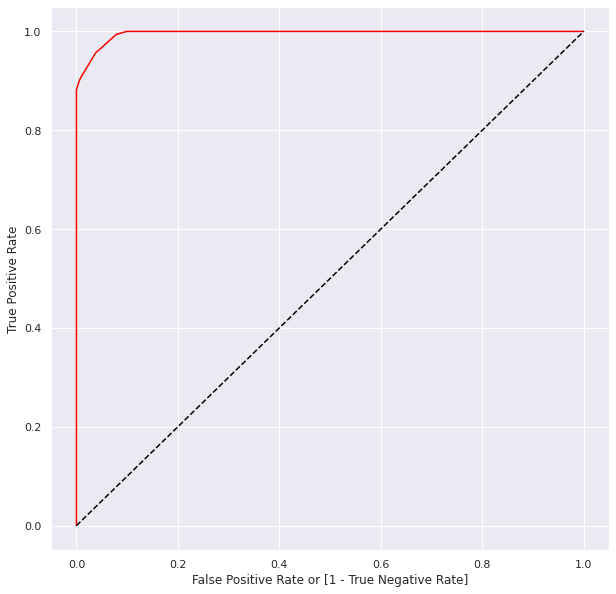

In [49]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_train, entro_model.predict_proba (x_train)[:,1])

# plot ROC Curve


auc = roc_auc_score(y_test, entro_preds)


plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
print(f'\n\n ROC AUC score: {auc} \n\n')

# **Building Decision Tree Classifier (CART) using Gini Criteria**

In [50]:
print(f'\n\n To find max depth \n\n')
for i in range(2,20):
  gini_model = DecisionTreeClassifier(criterion = 'gini',max_depth=i)
  gini_model.fit(x_train, y_train)
  a=gini_model.score(x_train, y_train)
  b=gini_model.score(x_test, y_test)
  print(f' number {i} : train {a} , test {b}')



 To find max depth 


 number 2 : train 0.5615615615615616 , test 0.4965034965034965
 number 3 : train 0.5915915915915916 , test 0.5384615384615384
 number 4 : train 0.6186186186186187 , test 0.5454545454545454
 number 5 : train 0.6741741741741741 , test 0.583916083916084
 number 6 : train 0.7312312312312312 , test 0.6643356643356644
 number 7 : train 0.7567567567567568 , test 0.6853146853146853
 number 8 : train 0.8138138138138138 , test 0.7307692307692307
 number 9 : train 0.8573573573573574 , test 0.7727272727272727
 number 10 : train 0.8903903903903904 , test 0.7972027972027972
 number 11 : train 0.9099099099099099 , test 0.8006993006993007
 number 12 : train 0.9369369369369369 , test 0.8286713286713286
 number 13 : train 0.954954954954955 , test 0.8566433566433567
 number 14 : train 0.9684684684684685 , test 0.8636363636363636
 number 15 : train 0.9819819819819819 , test 0.8706293706293706
 number 16 : train 0.987987987987988 , test 0.8811188811188811
 number 17 : train 0.993993

In [51]:
gini_model = DecisionTreeClassifier(criterion = 'gini',max_depth=16)
gini_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=16)

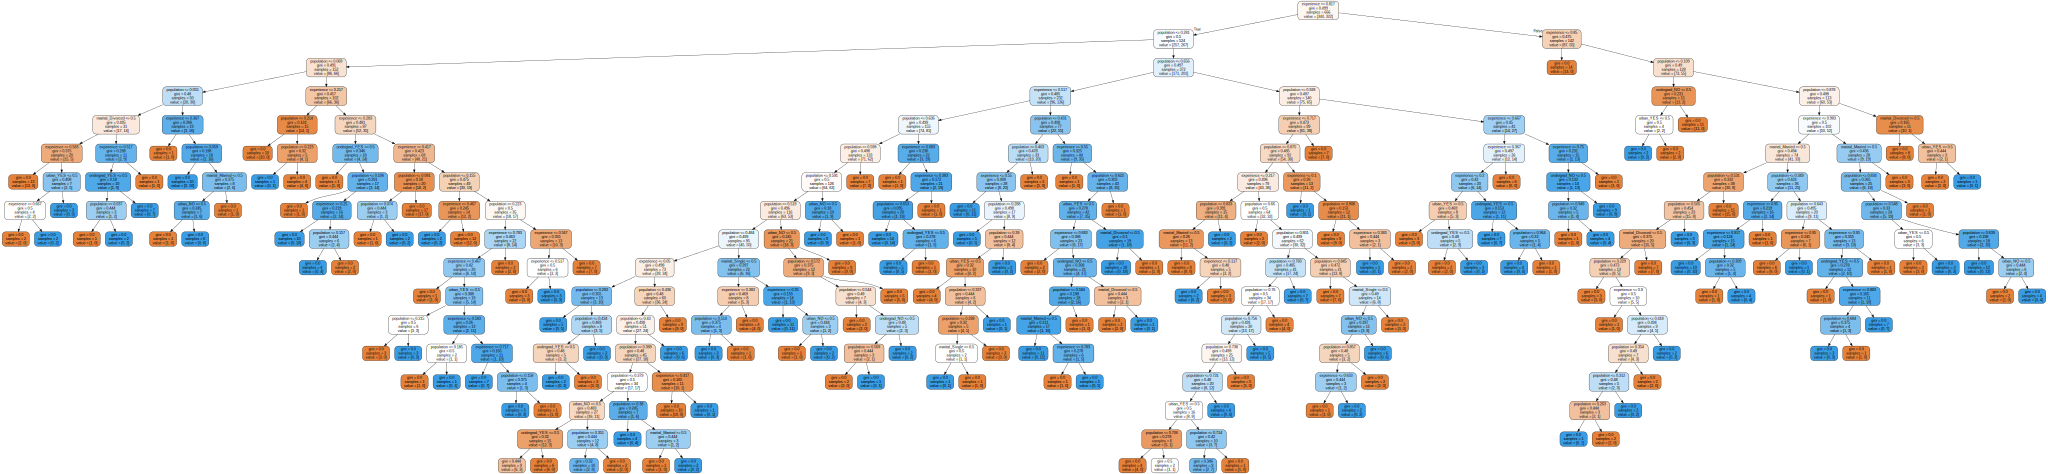

In [52]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(gini_model, filled=True, rounded=True, feature_names=x.columns, out_file=None)
graphviz.Source(dot_data)

In [53]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gini_model.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(gini_model.score(x_test, y_test)))

Training set score: 0.9880
Test set score: 0.8741


In [54]:
#Predicting on test data
gini_preds = gini_model.predict(x_test) # predicting on test data set 
pd.Series(gini_preds).value_counts()

1.0    180
0.0    106
dtype: int64

In [55]:
df1 = pd.DataFrame({'actual': y_test, 'Prediction': gini_preds})
df1.head()

,actual,Prediction
241,1.0,1.0
844,1.0,1.0
414,0.0,0.0
734,1.0,1.0
543,0.0,0.0


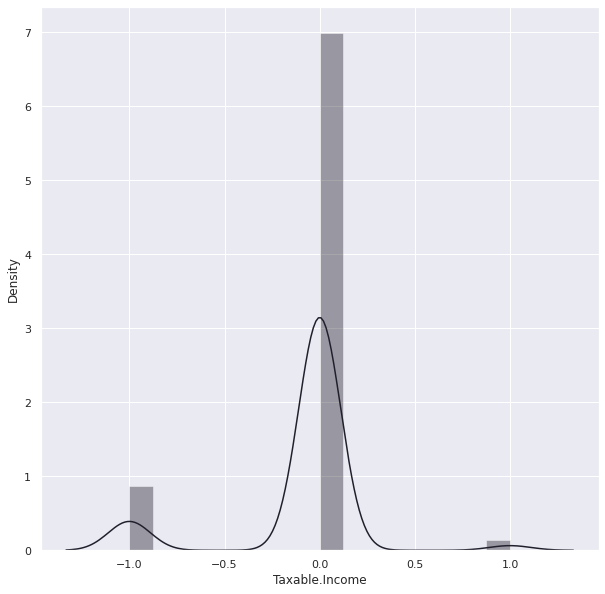

In [56]:
# checking difference between labled y and predicted y
sns.distplot(y_test-gini_preds)

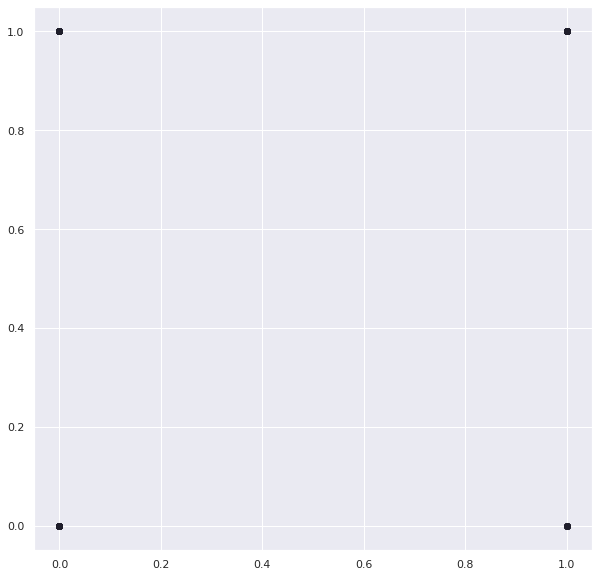

In [57]:
plt.scatter(y_test,gini_preds)

In [58]:
# print the scores between dependent test and predicted value
from sklearn.metrics import accuracy_score
print("Accuracy_score", accuracy_score(y_test,gini_preds)*100)

Accuracy_score 87.41258741258741


In [59]:
cm=pd.crosstab(y_test, gini_preds, rownames = ['Actual'], colnames= ['Predictions']) 
cm

Predictions,0.0,1.0
Actual,,
0.0,101,31
1.0,5,149


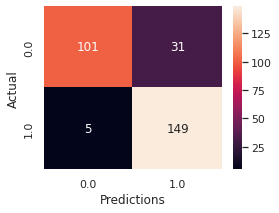

In [60]:
plt.figure(figsize=(4,3))
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

In [61]:
from sklearn.metrics import classification_report

print(classification_report(y_test, gini_preds))

              precision    recall  f1-score   support

         0.0       0.95      0.77      0.85       132
         1.0       0.83      0.97      0.89       154

    accuracy                           0.87       286
   macro avg       0.89      0.87      0.87       286
weighted avg       0.89      0.87      0.87       286



In [62]:
from sklearn.metrics import confusion_matrix,accuracy_score, mean_squared_error,classification_report

# RMSE for train data
train_preds_grid = gini_model.predict(x_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = np.sqrt(train_mse)

# RMSE for test data
test_preds_grid = gini_model.predict(x_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = np.sqrt(test_mse)
print(f'\n train rmse = {train_rmse} \n\n test rmse = {test_rmse} \n\n')


 train rmse = 0.1095993248702382 

 test rmse = 0.3547874375934496 




In [63]:
#Probability:

y_pred_prob = gini_model.predict_proba(x_test)

# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob , columns=['0','1'])

y_pred_prob_df

,0,1
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0
...,...,...
281,0.0,1.0
282,0.0,1.0
283,1.0,0.0
284,0.0,1.0




 ROC AUC score: 0.8663419913419914 




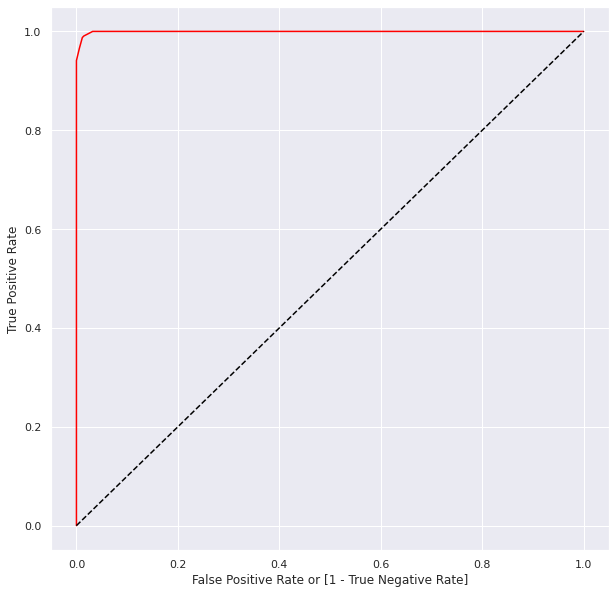

In [64]:
fpr, tpr, thresholds = roc_curve(y_train, gini_model.predict_proba (x_train)[:,1])

# plot ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, gini_preds)


plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
print(f'\n\n ROC AUC score: {auc} \n\n')

# **Grid-Search for  model tuning**

In [65]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [66]:
# Modelling

clf = DecisionTreeClassifier()
parameters = {
    'criterion': ['gini','entropy'],
    'splitter' : ['best','random'],
    'min_samples_split' : [2,5,10,20],
    'min_samples_leaf' : [2,5,10],
    'max_leaf_nodes' : [None,2,5,10,100],
    'max_depth' : range(2, 11),
    #[10,8,6,3],
    'random_state': [42],
}

grid = GridSearchCV(clf, parameters, 
                   n_jobs=-1,
                   verbose=1, scoring="accuracy")

In [67]:
# Fit the model
grid.fit(x_train, y_train)

Fitting 5 folds for each of 2160 candidates, totalling 10800 fits


GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 11),
                         'max_leaf_nodes': [None, 2, 5, 10, 100],
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20],
                         'random_state': [42], 'splitter': ['best', 'random']},
             scoring='accuracy', verbose=1)

In [68]:
print(grid.best_score_ ,'\n',"\n" , grid.best_params_)

0.6802379082033442 
 
 {'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': None, 'min_samples_leaf': 5, 'min_samples_split': 2, 'random_state': 42, 'splitter': 'best'}


In [69]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(grid.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(grid.score(x_test, y_test)))

Training set score: 0.8168
Test set score: 0.6958


In [70]:
# Predict test values
y_pred = grid.best_estimator_.predict(x_test)
acc = accuracy_score(y_test, y_pred)

print("Accuracy : ", acc)

Accuracy :  0.6958041958041958


# **Improving Model Accuracy**

In [71]:
model_gini = DecisionTreeClassifier(criterion = 'gini',random_state = 42)
path = model_gini.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas

array([0.        , 0.0012012 , 0.00125125, 0.0012705 , 0.001287  ,
       0.00135135, 0.001365  , 0.001365  , 0.00137638, 0.00137638,
       0.00139425, 0.00139425, 0.0014014 , 0.0014014 , 0.00141318,
       0.00142643, 0.0015015 , 0.0015444 , 0.00155711, 0.00163497,
       0.0017325 , 0.00177956, 0.0018018 , 0.002002  , 0.002002  ,
       0.00202125, 0.0021    , 0.002145  , 0.0022113 , 0.00224786,
       0.00225225, 0.00231   , 0.00232925, 0.00233567, 0.00238149,
       0.0024024 , 0.0024167 , 0.00245245, 0.00246383, 0.0025102 ,
       0.002541  , 0.002574  , 0.0026026 , 0.00266934, 0.0026754 ,
       0.0027027 , 0.00273   , 0.00278501, 0.0028028 , 0.00281532,
       0.0029484 , 0.0032032 , 0.00325905, 0.00333271, 0.00337838,
       0.0034034 , 0.003465  , 0.00385254, 0.00393608, 0.0040368 ,
       0.00406991, 0.00409017, 0.0041769 , 0.00422923, 0.00442082,
       0.00464607, 0.00466844, 0.0049342 , 0.00594805, 0.00618927,
       0.00633723])

In [72]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf_gini = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha, criterion = 'gini')
    clf_gini.fit(x_train, y_train)
    clfs.append(clf_gini)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.006337228618539655


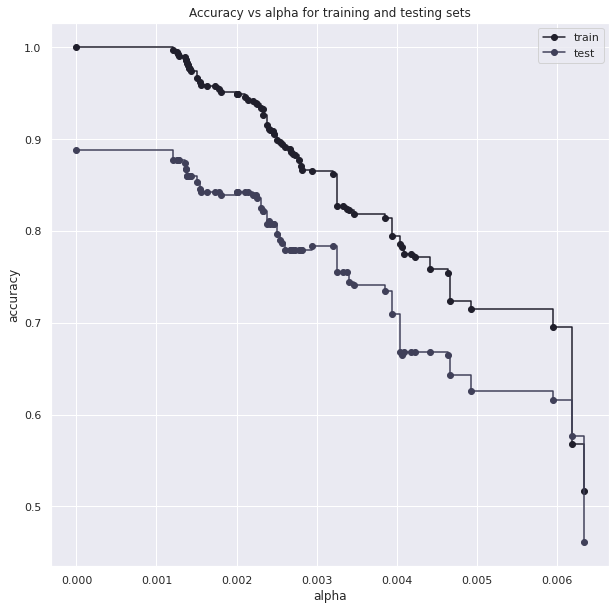

In [73]:
train_scores = [clf_gini.score(x_train, y_train) for clf_gini in clfs]
test_scores = [clf_gini.score(x_test, y_test) for clf_gini in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

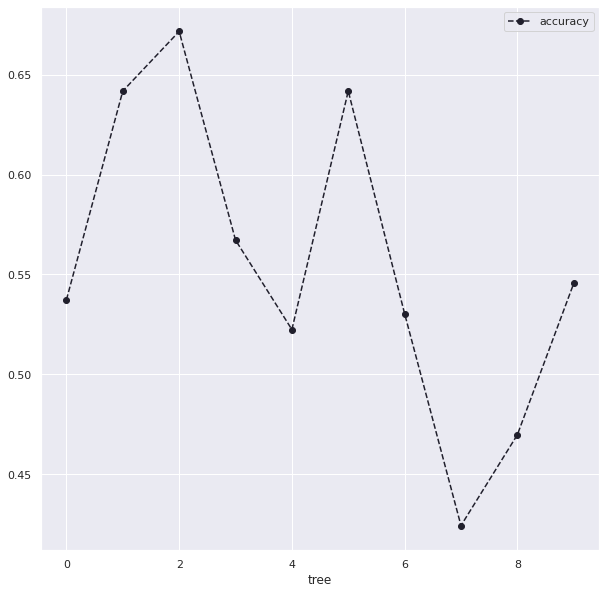

In [74]:
model=DecisionTreeClassifier(criterion = 'gini',random_state = 42 ,max_depth=10, max_leaf_nodes= None, min_samples_leaf=5, 
                                    min_samples_split= 2, splitter='best',ccp_alpha=0.0062,)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, shuffle=True, random_state=10)
scores = cross_val_score(model, x_train, y_train, cv=cv)

df=pd.DataFrame(data={'tree':range(10),'accuracy': scores})
df.plot(x='tree',y='accuracy', marker='o',linestyle='--')

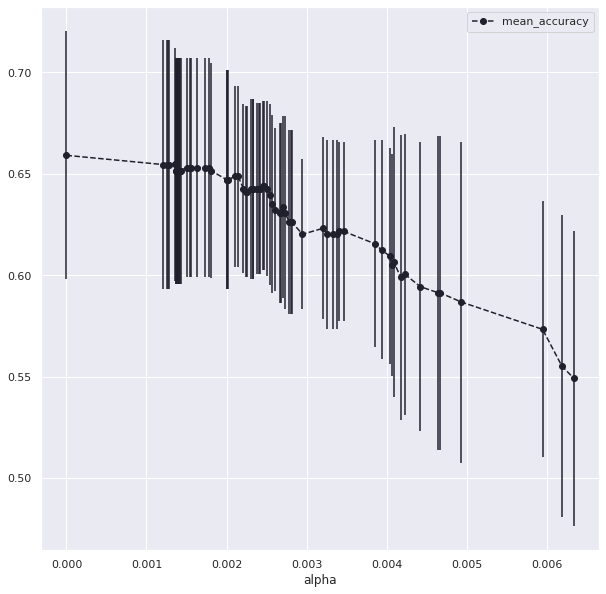

In [75]:
import numpy as np

alpha_loop_values=[]

for ccp_alpha in ccp_alphas:
  model=DecisionTreeClassifier(criterion = 'gini', random_state = 42,max_depth=10, max_leaf_nodes= None, min_samples_leaf=5, 
                                    min_samples_split= 2, splitter='best',
                               ccp_alpha=ccp_alpha,)
  cv = KFold(n_splits=10, shuffle=True, random_state=10)
  scores = cross_val_score(model, x_train, y_train, cv=cv)
  alpha_loop_values.append([ccp_alpha, np.mean(scores),np.std(scores)])

alpha_results = pd.DataFrame(alpha_loop_values,columns=['alpha','mean_accuracy','std'])

alpha_results.plot(x='alpha',y='mean_accuracy',yerr='std',marker='o',linestyle='--')

In [76]:
alpha_results=alpha_results[(alpha_results['alpha']>0)
              &
              (alpha_results['alpha']<0.004)].sort_values(by=['mean_accuracy'], ascending=False).iloc[0:1,:]
alpha_results

,alpha,mean_accuracy,std
5,0.001351,0.654591,0.05728


In [77]:
ideal_ccp_alpha=alpha_results['alpha']
ideal_ccp_alpha              

5    0.001351
Name: alpha, dtype: float64

In [78]:
ideal_ccp_alpha=float(ideal_ccp_alpha[0:])
ideal_ccp_alpha

0.0013513513513513516

In [79]:
pruned_model=DecisionTreeClassifier(criterion = 'gini',ccp_alpha=ideal_ccp_alpha,
                                random_state = 0)
pruned_model=pruned_model.fit(x_train,y_train)

In [80]:
# print the scores between dependent test and predicted value
from sklearn.metrics import accuracy_score

# Predict test values
pruned_pred = pruned_model.predict(x_test)
acc = accuracy_score(y_test, pruned_pred)

print("Accuracy : ", acc)

Accuracy :  0.8531468531468531


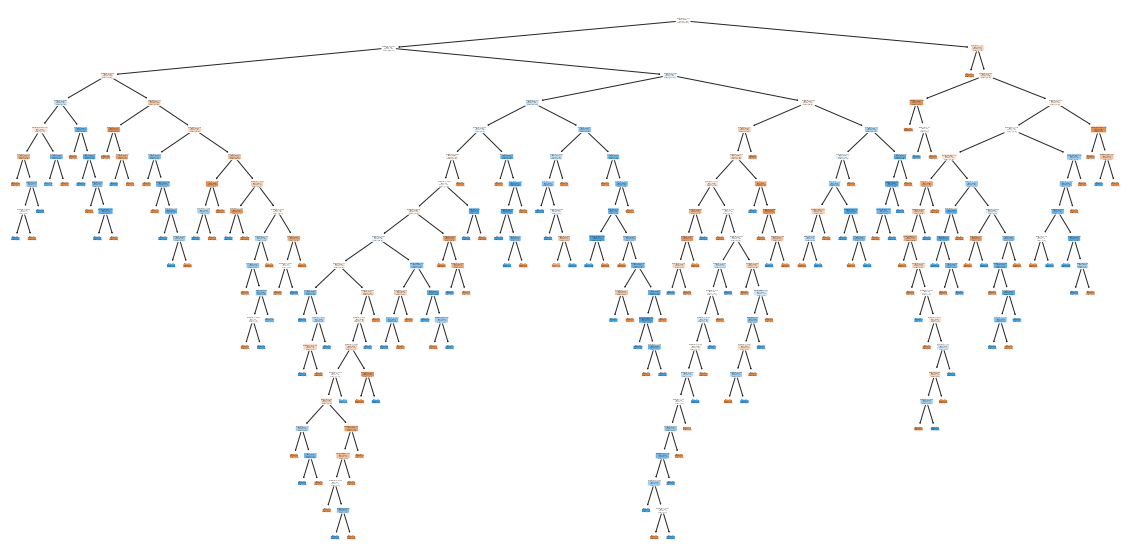

In [81]:
#PLot the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(pruned_model, filled = True , rounded = True , feature_names = x.columns);

In [82]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(pruned_model.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(pruned_model.score(x_test, y_test)))

Training set score: 0.9880
Test set score: 0.8531


In [83]:
#Predicting on test data
pruned_pred = pruned_model.predict(x_test) # predicting on test data set 
pd.Series(pruned_pred).value_counts()

1.0    180
0.0    106
dtype: int64

In [84]:
df1 = pd.DataFrame({'actual': y_test, 'Prediction': pruned_pred})
df1.head()

,actual,Prediction
241,1.0,1.0
844,1.0,1.0
414,0.0,1.0
734,1.0,1.0
543,0.0,0.0


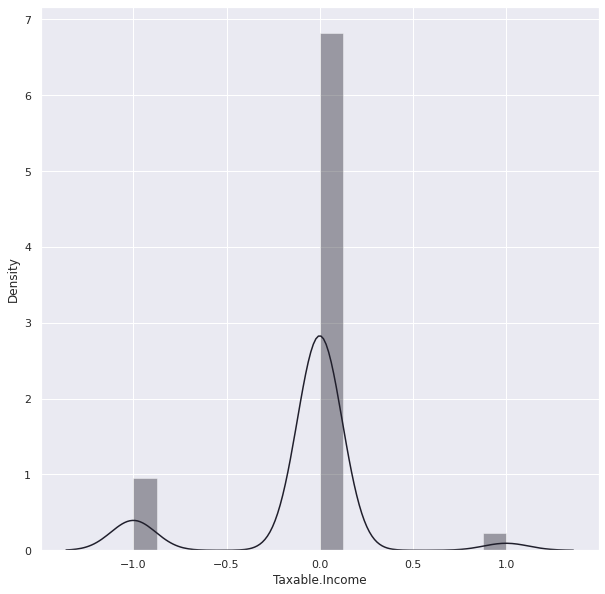

In [85]:
# checking difference between labled y and predicted y
sns.distplot(y_test-pruned_pred)

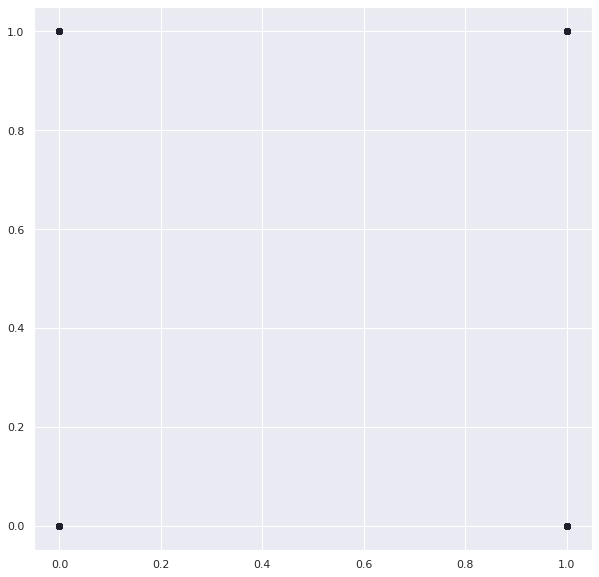

In [86]:
plt.scatter(y_test,pruned_pred)

In [87]:
# print the scores between dependent test and predicted value
from sklearn.metrics import accuracy_score
print("Accuracy_score", accuracy_score(y_test,pruned_pred)*100)

Accuracy_score 85.3146853146853


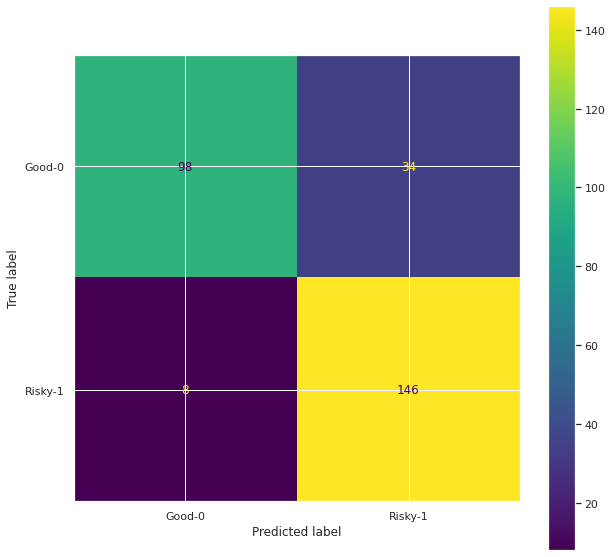

In [90]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(pruned_model,x_test,y_test,display_labels=["Good-0","Risky-1"])
plt.show()

In [91]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pruned_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.74      0.82       132
         1.0       0.81      0.95      0.87       154

    accuracy                           0.85       286
   macro avg       0.87      0.85      0.85       286
weighted avg       0.86      0.85      0.85       286



In [92]:
from sklearn.metrics import confusion_matrix,accuracy_score, mean_squared_error,classification_report

# RMSE for train data
train_preds_grid = pruned_model.predict(x_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = np.sqrt(train_mse)

# RMSE for test data
test_preds_grid = pruned_model.predict(x_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = np.sqrt(test_mse)
print(f'\n train rmse = {train_rmse} \n\n test rmse = {test_rmse} \n\n')


 train rmse = 0.1095993248702382 

 test rmse = 0.38321423101595126 




In [93]:
#Probability:

y_pred_prob = pruned_model.predict_proba(x_test)
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob , columns=['0','1'])

y_pred_prob_df

,0,1
0,0.0,1.0
1,0.0,1.0
2,0.1,0.9
3,0.0,1.0
4,1.0,0.0
...,...,...
281,0.0,1.0
282,0.8,0.2
283,1.0,0.0
284,0.1,0.9




 ROC AUC score: 0.8452380952380952 




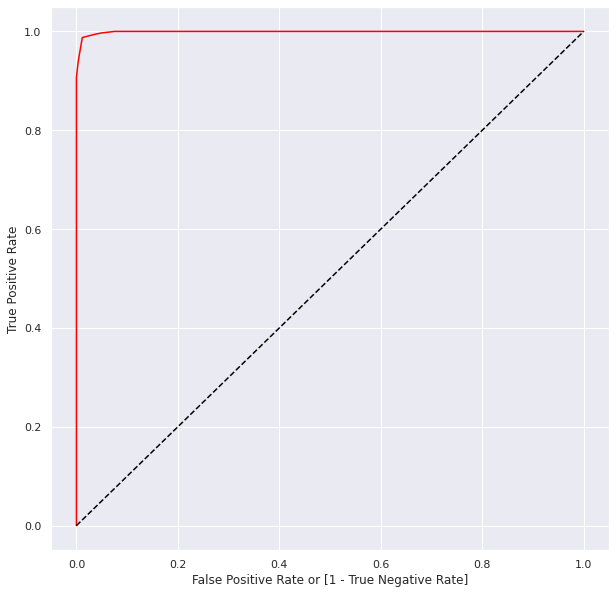

In [94]:
fpr, tpr, thresholds = roc_curve(y_train, pruned_model.predict_proba (x_train)[:,1])

# plot ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, pruned_pred)

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
print(f'\n\n ROC AUC score: {auc} \n\n')

# **Feature importnace**

In [95]:
pruned_model.feature_importances_

array([0.49268346, 0.29316716, 0.01339454, 0.03099019, 0.02181864,
       0.04789675, 0.02494676, 0.02533933, 0.04976316])

In [96]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': pruned_model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [97]:
fi

,feature,importance
0,population,0.492683
1,experience,0.293167
8,urban_YES,0.049763
5,marital_Married,0.047897
3,undergrad_YES,0.030990
7,urban_NO,0.025339
6,marital_Single,0.024947
4,marital_Divorced,0.021819
2,undergrad_NO,0.013395


Advantages Of Decision Tree Classification
Enlisted below are the various merits of Decision Tree Classification:

1. Decision tree classification does not require any domain knowledge, hence, it is appropriate for the knowledge discovery process.
2. The representation of data in the form of the tree is easily understood by humans and it is intuitive.
3. It can handle multidimensional data.
4. It is a quick process with great accuracy.


---
Disadvantages Of Decision Tree Classification
Given below are the various demerits of Decision Tree Classification:

1. Sometimes decision trees become very complex and these are called overfitted trees.
2. The decision tree algorithm may not be an optimal solution.
3. The decision trees may return a biased solution if some class label dominates it.

# **Prediction and Accuracy Of 3 Different Methods**

In [98]:
df1 = pd.DataFrame({'actual': y_test, 'Pruned_Prediction': pruned_pred,  'Gini_Prediction': gini_preds,  'Entro_Prediction': entro_preds})
df1.head()

,actual,Pruned_Prediction,Gini_Prediction,Entro_Prediction
241,1.0,1.0,1.0,1.0
844,1.0,1.0,1.0,1.0
414,0.0,1.0,0.0,0.0
734,1.0,1.0,1.0,0.0
543,0.0,0.0,0.0,0.0


In [99]:
print("Gini_Accuracy_score", accuracy_score(y_test,gini_preds)*100)
print("Entropy_Accuracy_score", accuracy_score(y_test,entro_preds)*100)
print("Pruned_Accuracy_score", accuracy_score(y_test,pruned_pred)*100)

Gini_Accuracy_score 87.41258741258741
Entropy_Accuracy_score 85.66433566433567
Pruned_Accuracy_score 85.3146853146853


> By checking Three different method we came up with the conclusion that the performance of Gini Model is giving us a best accuracy compare to other model.